# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

Reading data

In [4]:
df=pd.read_excel('K3.xlsx')
df.head()

,G,P
0,0.008667,0.018119
1,0.164500,0.369489
2,0.717500,1.601420
3,0.902167,1.973920
4,1.086000,2.448440


plotting relatioship between the variables

Text(0, 0.5, 'power')

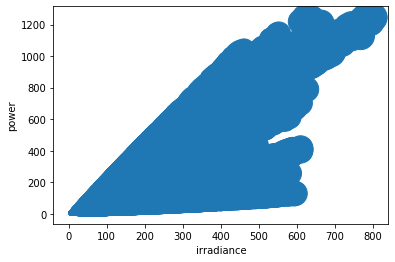

In [5]:
plt.scatter(df.G,df.P,df.T)
plt.xlabel('irradiance',)
plt.ylabel('power')

Creating the cluster

In [7]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

predicting cluster values

In [8]:
y_pred=km.fit_predict(df)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [9]:
df['cluster']=y_pred
df.head()

,G,P,cluster
0,0.008667,0.018119,4
1,0.164500,0.369489,4
2,0.717500,1.601420,4
3,0.902167,1.973920,4
4,1.086000,2.448440,4


Plotting the cluster

Text(0, 0.5, 'P')

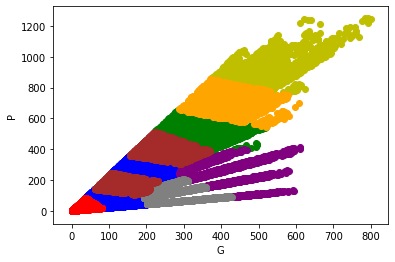

In [10]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='y')
plt.scatter(df4.G,df4.P, color='r')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='brown')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

Carrying out Normalisation for more effiecient results

In [11]:
scaler= MinMaxScaler()
scaler.fit(df[['G']])
df[['G']]=scaler.transform(df[['G']])
scaler.fit(df[['P']])
df[['P']]=scaler.transform(df[['P']])
df.head()

,G,P,cluster
0,0.000011,0.000014,4
1,0.000205,0.000295,4
2,0.000896,0.001279,4
3,0.001126,0.001576,4
4,0.001356,0.001955,4


In [12]:
km=KMeans(n_clusters=10)
y_pred=km.fit_predict(df[['G','P']])
y_pred

array([8, 8, 8, ..., 8, 8, 8])

In [13]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

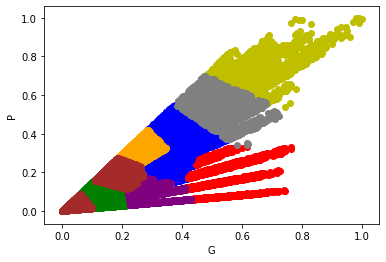

In [14]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='y')
plt.scatter(df4.G,df4.P, color='r')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='brown')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

obtaining the centroids for each cluster

In [15]:
km.cluster_centers_

array([[0.13672855, 0.0750872 ],
       [0.39525623, 0.40351347],
       [0.34317807, 0.22677206],
       [0.65793665, 0.7223019 ],
       [0.51123152, 0.15864347],
       [0.25231724, 0.31320242],
       [0.30434645, 0.08887045],
       [0.52253573, 0.52579376],
       [0.02889737, 0.01802417],
       [0.18776429, 0.19505131]])

Text(0, 0.5, 'P')

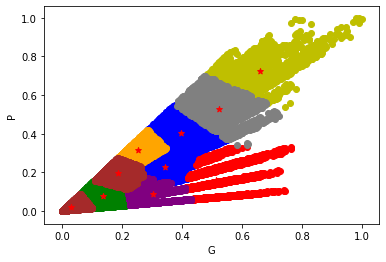

In [16]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='b')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='y')
plt.scatter(df4.G,df4.P, color='r')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='brown')
plt.scatter(df9.G,df9.P, color='brown')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [17]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['G','P']])
    sse.append(km.inertia_)

In [18]:
sse

[3216.8677071340853,
 1379.5409499438729,
 797.0322786262485,
 604.3703516534714,
 445.4919269035332,
 344.8336365411029,
 296.1284473203027,
 248.49941002769506,
 219.40112973076245,
 199.4957240771093]

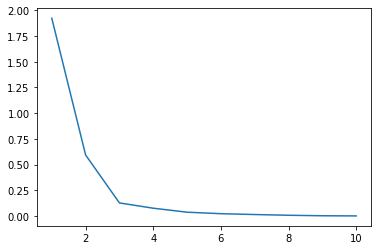

In [24]:
plt.plot(k_range,sse)

Fitting the model with the new K value as 3

In [19]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['G','P']])

In [20]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

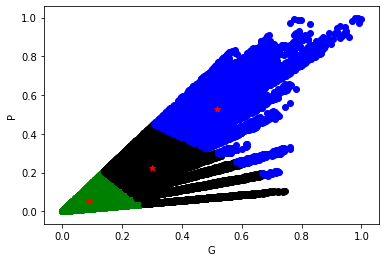

In [22]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')